## Iris PCA



## Package setups

In [1]:
# Import needed packages
# You may add or remove packages should you need them
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_iris
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, LeaveOneOut, cross_val_score
from sklearn.decomposition import PCA

# Set random seed
#np.random.seed(0)


## Step 1: Loading the data

In [2]:
# Load the Iris dataset included with scikit-learn
dataset = load_iris()

# Put data in a pandas DataFrame
df_iris = pd.DataFrame(dataset.data, columns=dataset.feature_names)
# Add target and class to DataFrame
df_iris['target'] = dataset.target
# Show 10 random samples
df_iris.sample(n=10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
2,4.7,3.2,1.3,0.2,0
17,5.1,3.5,1.4,0.3,0
34,4.9,3.1,1.5,0.2,0
147,6.5,3.0,5.2,2.0,2
89,5.5,2.5,4.0,1.3,1
84,5.4,3.0,4.5,1.5,1
8,4.4,2.9,1.4,0.2,0
129,7.2,3.0,5.8,1.6,2
124,6.7,3.3,5.7,2.1,2


C:\Users\ana.duran\AppData\Local\Continuum\anaconda3\envs\exercisew3d1\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\ana.duran\AppData\Local\Continuum\anaconda3\envs\exercisew3d1\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


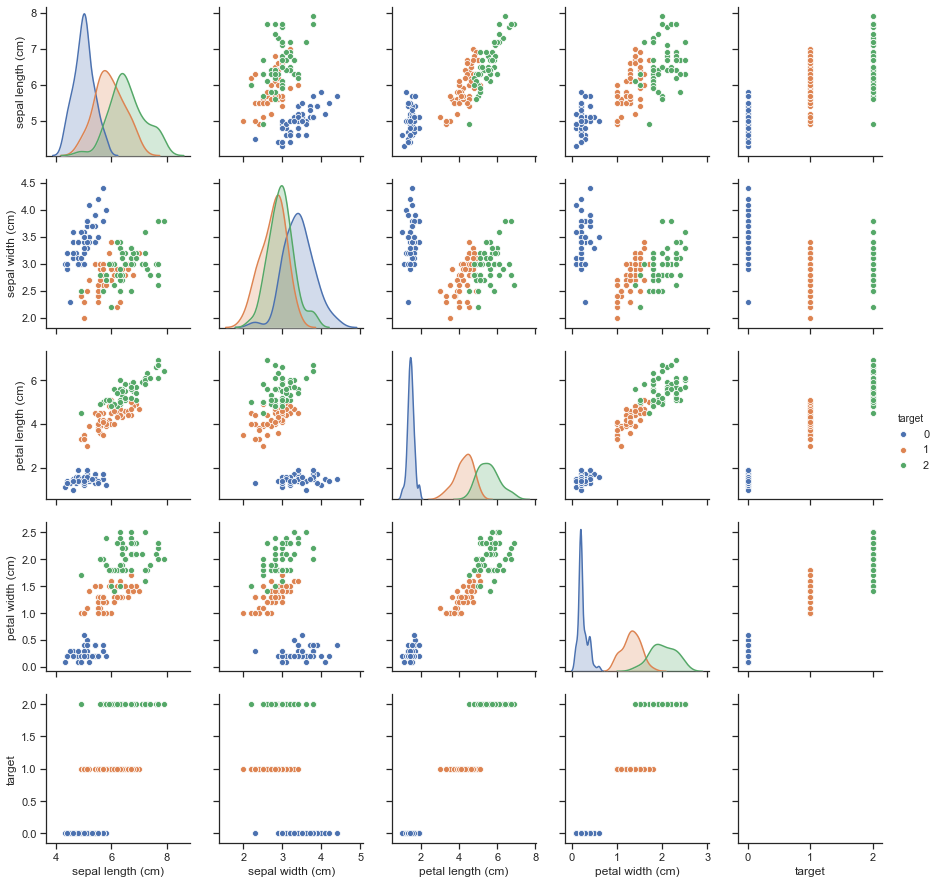

In [3]:
sns.set(style="ticks")
sns.pairplot(data = df_iris.loc[:,:"target"], hue = 'target')

1. How many principal components can we consider?

2. How do you think is going to be the cumulated percentage of explained variance attending to the number of components? Calculate it.
3. Consider the necessary number of components to explain at least a 99% of the variance. Give the equations to calculate these components.
4. Calculate the new values for this decomposition and plot them.
5. Repeat the steps 3 and 4 taking a 95% of the variance

In [4]:
pca = PCA()
df_pca = df_iris.drop(['target'], axis=1)
pca.fit_transform(df_pca)
y_variance = pca.explained_variance_ratio_
df_pca.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
print(y_variance)

[0.92461872 0.05306648 0.01710261 0.00521218]


In [6]:
print(pd.DataFrame(pca.components_, columns=df_pca.columns))

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0           0.361387         -0.084523           0.856671          0.358289
1           0.656589          0.730161          -0.173373         -0.075481
2          -0.582030          0.597911           0.076236          0.545831
3          -0.315487          0.319723           0.479839         -0.753657


Text(0.5, 1.0, 'PCA')

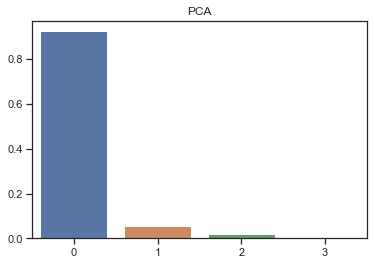

In [7]:
sns.barplot(x=[i for i in range(len(y_variance))], y=y_variance)
plt.title("PCA")

# Question 1

1. How many principal components can we consider?
We can consider 1 principal component, cero

# Question 2

2. How do you think is going to be the cumulated percentage of explained variance attending to the number of components? Calculate it.

In [8]:
print(y_variance)

[0.92461872 0.05306648 0.01710261 0.00521218]


In [9]:
print ("The first component is ", y_variance[0])

The first component is  0.9246187232017271


In [10]:
print ("The sum of component 1 and 2 is ", y_variance[0]+y_variance[1])

The sum of component 1 and 2 is  0.977685206318795


In [11]:
print ("The sum of component 1, 2 and 3 is ", y_variance[0]+y_variance[1]+y_variance[2])

The sum of component 1, 2 and 3 is  0.9947878161267247


# Question 3

3. Consider the necessary number of components to explain at least a 99% of the variance. Give the equations to calculate these components.

In [12]:
print ("The sum of component 1, 2 and 3 is ", y_variance[0]+y_variance[1]+y_variance[2])

The sum of component 1, 2 and 3 is  0.9947878161267247


In [13]:
suma = 0
components = 0
for x in y_variance:
    if suma<0.99:
        components +=1
        suma += x
    else:
        print("Components needed =", components)
        print("The sum of those components is", suma)
        

Components needed = 3
The sum of those components is 0.9947878161267247


# Question 4

4. Calculate the new values for this decomposition and plot them.

In [14]:
pca = PCA(n_components = 3)
df_pca = df_iris.drop('target', axis=1)
df_transformed = pca.fit_transform(df_pca)
y_variance = pca.explained_variance_ratio_

In [15]:
print(y_variance)

[0.92461872 0.05306648 0.01710261]


In [16]:
print(pd.DataFrame(pca.components_, columns=df_pca.columns))

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0           0.361387         -0.084523           0.856671          0.358289
1           0.656589          0.730161          -0.173373         -0.075481
2          -0.582030          0.597911           0.076236          0.545831


Text(0.5, 1.0, 'PCA')

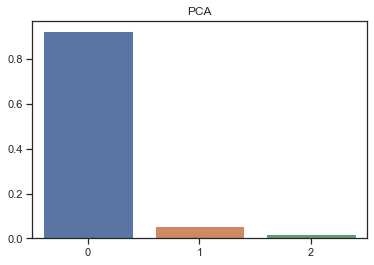

In [17]:
sns.barplot(x=[i for i in range(len(y_variance))], y=y_variance)
plt.title("PCA")

# Question 5

5. Repeat the steps 3 and 4 taking a 95% of the variance

In [18]:
suma = 0
components = 0
for x in y_variance:
    if suma<0.95:
        components +=1
        suma += x
    else:
        print("Components needed =", components)
        print("The sum of those components is", suma)

Components needed = 2
The sum of those components is 0.977685206318795


[0.92461872 0.05306648]


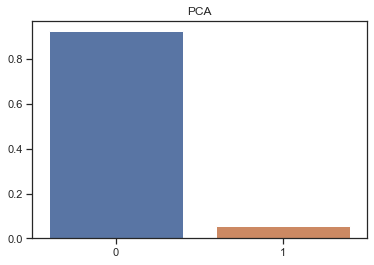

In [21]:
pca = PCA(n_components = 2)
df_pca = df_iris.drop('target', axis=1)
df_transformed = pca.fit_transform(df_pca)
y_variance = pca.explained_variance_ratio_
sns.barplot(x=[i for i in range(len(y_variance))], y=y_variance)
plt.title("PCA")
print(y_variance)

# The end